In [87]:
import numpy as np
import pandas as pd
import re
from pandas import DataFrame
from sqlalchemy import create_engine

%matplotlib inline

In [2]:
# Connecting to the db
host_db = "cal-patent-lab.chhaitskv8dz.us-west-2.rds.amazonaws.com"
username = "***REMOVED***"
password = "***REMOVED***"
db = "***REMOVED***"

engine = create_engine("mysql://{}:{}@{}/{}".format(
    username, password, host_db, db))
connection = engine.connect()
patents_decision = pd.read_sql("SELECT patent_id, invalidated FROM patents_decision", engine)
connection.close()

In [3]:
patents_data = patents_decision[patents_decision["invalidated"].isin([0, 1])]
patents_id = list(patents_data.patent_id)

In [4]:
def get_information(query):
    # Connecting to the fung db
    engine_fung = create_engine("mysql://:@/uspto")
    connection_fung = engine_fung.connect()
    patent_info = pd.read_sql(
        query, engine_fung)
    # s =str("SELECT * FROM patent WHERE id IN {}".format)
    # rs = connection_fung.execute(s, patents_id=tuple(patents_id,)).fetchall()
    connection.close()
    return patent_info

In [6]:
query =str("SELECT * FROM patent WHERE id IN {}".format(tuple(patents_id)))
inventor_query = "SELECT * FROM patent JOIN patent_inventor \
ON patent.id = patent_inventor.patent_id JOIN inventor on patent_inventor.inventor_id=inventor.id \
WHERE patent.id IN {};".format(
tuple(patents_id))
lawyer_query = "SELECT patent.id AS patent_id, lawyer.* FROM patent JOIN patent_lawyer ON patent.id = \
patent_lawyer.patent_id JOIN lawyer on patent_lawyer.lawyer_id=lawyer.id WHERE patent.id IN {};".format(
tuple(patents_id))
assignee_query ="SELECT patent.id AS patent_id, assignee.* FROM patent JOIN patent_assignee ON patent.id = \
patent_assignee.patent_id JOIN assignee on patent_assignee.assignee_id=assignee.id WHERE patent.id IN {};".format(
tuple(patents_id))

inventor_info = get_information(inventor_query)
lawyer_info = get_information(lawyer_query)
assignee_info = get_information(assignee_query)

In [7]:
inventor_info = get_information(inventor_query)
inventor_info = inventor_info.drop(['number', 'id', 'inventor_id', 'nationality'], axis=1)
inventor_info = inventor_info.rename(columns={'name_first': 'inventor_name_first',
                              'name_last': 'inventor_name_last'})

In [22]:
patents_decision
patents_data = patents_decision[patents_decision["invalidated"].isin([0, 1])]

In [131]:
patent_data_decision

,type_x,country_x,date,abstract,title,kind,num_claims,patent_id,inventor_name_first,inventor_name_last,...,organization_x,country_y,id_y,type_y,name_first_y,name_last_y,organization_y,residence,nationality,invalidated
0,,,1991-04-02,An improved process is provided for treating a...,Silicone polymer-internally coated webs,,27.0,5004643,J MICHAEL,CALDWELL,...,NaN,NaN,f499af1a99470356d286a6315f610237,,,,"SILI-TEX, INC.",,,0.0
2,,,1992-09-29,CPU stores information showing a time-temperat...,Method for heat-processing semiconductor devic...,,12.0,5151871,CHIZO,YAMAGUCHI,...,NaN,NaN,fd193ce7327f463d32935cbc72d82b8b,3,,,Tokyo Electron Limited,,,0.0
4,,,1992-09-29,CPU stores information showing a time-temperat...,Method for heat-processing semiconductor devic...,,12.0,5151871,MASAAKI,MURAKAMI,...,NaN,NaN,fd193ce7327f463d32935cbc72d82b8b,3,,,Tokyo Electron Limited,,,0.0
6,,,1992-09-29,CPU stores information showing a time-temperat...,Method for heat-processing semiconductor devic...,,12.0,5151871,KIMIHARU,MATSUMURA,...,NaN,NaN,fd193ce7327f463d32935cbc72d82b8b,3,,,Tokyo Electron Limited,,,0.0
8,,,1992-09-29,CPU stores information showing a time-temperat...,Method for heat-processing semiconductor devic...,,12.0,5151871,HIROYUKI,SAKAI,...,NaN,NaN,fd193ce7327f463d32935cbc72d82b8b,3,,,Tokyo Electron Limited,,,0.0
10,,,1992-09-29,CPU stores information showing a time-temperat...,Method for heat-processing semiconductor devic...,,12.0,5151871,TETSUYA,ODA,...,NaN,NaN,fd193ce7327f463d32935cbc72d82b8b,3,,,Tokyo Electron Limited,,,0.0
12,,,1993-03-02,The present invention is a method for transmit...,Method for transmitting a desired digital vide...,,6.0,5191573,ARTHUR R,HAIR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
13,,,1993-07-13,The universal remote control system includes a...,Remotely upgradable universal remote control,,21.0,5228077,PAUL V,DARBEE,...,NaN,NaN,bb640f014673e526d53be92374b314a0,2,,,Universal Electronics Inc.,,,1.0
15,,,1993-10-19,The universal remote control system includes a...,Universal remote control system,,20.0,5255313,PAUL V,DARBEE,...,NaN,NaN,bb640f014673e526d53be92374b314a0,2,,,Universal Electronics Inc.,,,1.0
17,,,1994-06-21,Digital data are transmitted as packets within...,"Digital transmission system, transmitter and r...",,33.0,5323396,GERARDUS C,LOKHOFF,...,NaN,NaN,321c7dba047c3ef726aa2a6b80e149ae,,,,U.S. PHILIPS CORPORATION,,,0.0


In [78]:
patent_info_with_decision = pd.merge(patent_info, patents_data, how="inner", on="patent_id")
patent_data_decision = patent_info_with_decision.drop_duplicates()

In [85]:
num_claims_inv = patent_data_decision[patent_data_decision['invalidated'].isin([1])].num_claims
num_claims_ninv = patent_data_decision[patent_data_decision['invalidated'].isin([0])].num_claims

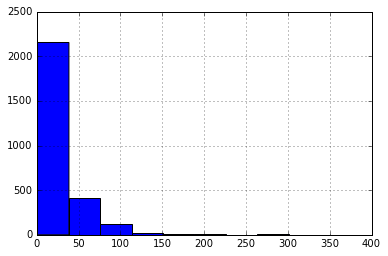

In [88]:
num_claims_ninv.hist()

In [1]:
num_claims_inv.hist()

NameError: name 'num_claims_inv' is not defined

In [15]:
temp_info = pd.merge(lawyer_info, assignee_info, how="outer", on="patent_id")
patent_info = pd.merge(inventor_info, temp_info, how="outer", on="patent_id")

In [91]:
num_claims_ninv.describe()

count    2751.000000
mean       30.620502
std        32.032255
min         1.000000
25%              NaN
50%              NaN
75%              NaN
max       376.000000
Name: num_claims, dtype: float64

In [94]:
num_claims_inv.describe()

count    2409.000000
mean       30.101702
std        26.939532
min         1.000000
25%              NaN
50%              NaN
75%              NaN
max       319.000000
Name: num_claims, dtype: float64

In [122]:
org_total = patent_data_decision[patent_data_decision['invalidated'].isin([0, 1])].groupby("organization_y").count().invalidated
org_inval = patent_data_decision[patent_data_decision['invalidated'].isin([0, 1])].groupby("organization_y").sum().invalidated

In [126]:
org_ratio = {}
for i, j in org_total.iteritems():
    org_ratio[i] = org_inval[i]/float(j)

In [127]:
print(org_ratio)

{'': 0.36363636363636365, 'Evercom Systems, Inc.': 1.0, 'Sony Corporation': 0.0, 'Depomed, Inc.': 1.0, 'Paice LLC': 0.80000000000000004, 'Honeywell International Inc.': 0.54545454545454541, 'DW-Link Incorporated': 0.0, 'R N Industries, Inc.': 0.0, 'Sense Pad Tech Co., Ltd': 0.0, 'Cordelia Lighting, Inc.': 0.0, 'Wyeth LLC': 1.0, 'Trilogy Development Group, Inc.': 0.125, 'Endovascular Technologies, Inc.': 1.0, 'Canon Kabushiki Kaisha': 0.0, 'PRO-HITTER CORPORATION': 1.0, 'Kimberly-Clark Worldwide, Inc.': 0.5714285714285714, 'SimpleAir Holdings, Inc.': 0.0, 'Vastview Technology, Inc.': 1.0, 'ORALSCAN/TRYLON JOINT VENTURE': 0.0, 'Paul Hartmann AG': 0.0, 'Motia Inc.': 0.0, 'Hammerhead Systems, Inc.': 1.0, 'Skyworks Solutions, Inc.': 0.55555555555555558, 'ICON HEALTH & FITNESS, INC.': 1.0, 'XY, LLC': 1.0, 'SEMCO, INC.': 1.0, 'Bristol-Myers Squibb Company': 0.21428571428571427, 'Zipit Wireless, Inc.': 1.0, 'LOCATIONET SYSTEMS 2000 LTD.': 1.0, 'UNIVERSITY OF TEXAS': 0.0, 'TPK Touch Solutions I

In [129]:
org_inval.sort_values(ascending=False)

organization_y
ContentGuard Holdings, Inc.                                    63.0
GO, INC.                                                       51.0
NuVasive, Inc.                                                 44.0
University of Saskatchewan                                     36.0
QUEEN'S UNIVERSITY OF BELFAST                                  36.0
Merial                                                         36.0
XceedID Corporation                                            32.0
PROGRESSIVE CASUALTY INSURANCE COMPANY                         30.0
Audatex North America, Inc.                                    28.0
Universal Electronics Inc.                                     28.0
Supernus Pharmaceuticals, Inc.                                 27.0
OpinionLab, Inc.                                               26.0
Novartis AG                                                    24.0
KEY-TECH, INC.                                                 24.0
Veritas Operating Corporation    

In [130]:
org_total.sort_values(ascending=False)

organization_y
ContentGuard Holdings, Inc.                                    87
Monsanto Technology LLC                                        78
HEARTSTREAM, INC.                                              68
The Procter & Gamble Company                                   66
SimpleAir, Inc.                                                60
NuVasive, Inc.                                                 53
GO, INC.                                                       51
Donnelly Corporation                                           48
Magna Electronics Inc.                                         38
Universal Electronics Inc.                                     38
Merial                                                         36
University of Saskatchewan                                     36
QUEEN'S UNIVERSITY OF BELFAST                                  36
Advanced Micro Devices, Inc.                                   33
XceedID Corporation                                          

In [110]:
org_ninv = patent_data_decision[patent_data_decision['invalidated'].isin([0])].groupby("organization_y").count().invalidated
org_inv = patent_data_decision[patent_data_decision['invalidated'].isin([1])].groupby("organization_y").count().invalidated

In [113]:
org_inv.align(org_ninv)

(organization_y
                                                                                     8.0
 1st Communications Inc.                                                             NaN
 3361781 Canada Inc.                                                                 NaN
 3D LABS                                                                             NaN
 3DLABS, Inc. LTD                                                                    NaN
 3M Innovative Properties Company                                                    7.0
 5TH MARKET, INC.                                                                    4.0
 A-I Packaging Solutions, Inc.                                                       2.0
 ACERNE ENTERPRISES, LLC                                                             1.0
 ACTV Inc.                                                                           NaN
 ADC Technology Inc.                                                                 1.0
 ADS 